 #Load and Inspect Data

In [ ]:
import pandas as pd


In [ ]:
calendar_path = "/content/calendar.csv"
listings_path = "/content/listings.csv"
calendar = pd.read_csv(calendar_path, on_bad_lines='skip')
listings = pd.read_csv(listings_path, on_bad_lines='skip')

# Show the first 5 rows of each DataFrame

In [ ]:
calendar.head()
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27979,https://www.airbnb.com/rooms/27979,20241225160331,2024-12-26,previous scrape,"Easy going landlord,easy place",NaN,NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
1,47516,https://www.airbnb.com/rooms/47516,20241225160331,2024-12-26,city scrape,Beautiful waterfront house,NaN,NaN,https://a0.muscache.com/pictures/271998/b090ad...,214456,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,55681,https://www.airbnb.com/rooms/55681,20241225160331,2024-12-26,city scrape,Sathorn Terrace Apartment(61),NaN,NaN,https://a0.muscache.com/pictures/71205c61-1553...,263049,...,4.89,4.77,4.85,NaN,f,7,0,3,0,0.21
3,55686,https://www.airbnb.com/rooms/55686,20241225160331,2024-12-26,city scrape,Comfy bedroom near River pier & BTS Taksin.,This is one of our 'Escape' sleep room : hoste...,"Charoen krung street, River pier, Iconsiam, Su...",https://a0.muscache.com/pictures/efc8006f-02bb...,263049,...,4.85,4.74,4.69,NaN,f,7,0,3,0,1.24
4,105042,https://www.airbnb.com/rooms/105042,20241225160331,2024-12-26,city scrape,Central Bangkok 3 Bedroom Apartment,We are Airbnb Super Hosts. Book our apartment ...,Sukhumvit Rd is the shopping and restaurant di...,https://a0.muscache.com/pictures/50404407/23b0...,545890,...,4.89,4.86,4.76,NaN,f,1,1,0,0,0.91


In [ ]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

#What it does:

Removes dollar signs ($) and commas (,) from the 'price' column using a regular expression.

Converts the cleaned string values to float type for numerical analysis.

Why:

Prices in CSV files are often stored as strings like "$1,234.00", which can't be used for calculations until cleaned and converted to numbers.

In [ ]:
calendar['date'] = pd.to_datetime(calendar['date'])

#What it does:

Converts the 'date' column from string format (like "2023-05-01") to pandas' datetime objects.

Why:

This allows you to easily perform date-based operations, filtering, and time series analysis.

In [ ]:
calendar['is_booked'] = calendar['available'].apply(lambda x: 1 if x == 'f' else 0)

#What it does:

Looks at the 'available' column for each row.

If the value is 'f' (which likely stands for "false", meaning not available or booked), it sets 'is_booked' to 1.

Otherwise (if 'available' is 't' for "true", meaning available), it sets 'is_booked' to 0.

Why:

This creates a new column 'is_booked' that is easier to work with for analysis:

1 = Booked (not available)

0 = Not booked (available)

You can now easily count, filter, or analyze bookings as numbers.

In [ ]:
listings_clean = listings[[
    'id', 'room_type', 'neighbourhood', 'bedrooms', 'bathrooms', 'accommodates', 'price'
]].copy()

# Clean price
listings_clean['price'] = listings_clean['price'].replace('[\$,]', '', regex=True).astype(float)


#From this file, we’ll keep only useful columns like:

id → listing ID

room_type

neighbourhood

bedrooms, bathrooms, accommodates

price (base listing price)

In [ ]:
calendar.rename(columns={'listing_id': 'id'}, inplace=True)

df = calendar.merge(listings_clean, on='id', how='inner')


<Axes: title={'center': 'Average Booking Rate by Month'}, xlabel='month', ylabel='Booking Rate'>

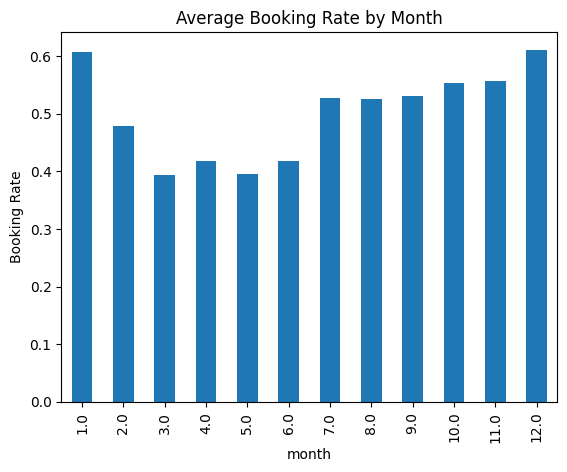

In [ ]:
df['month'] = df['date'].dt.month

monthly_demand = df.groupby('month')['is_booked'].mean()

monthly_demand.plot(kind='bar', title='Average Booking Rate by Month', ylabel='Booking Rate')


<Axes: title={'center': 'Booking Rate by Day of Week'}, xlabel='day_of_week', ylabel='Booking Rate'>

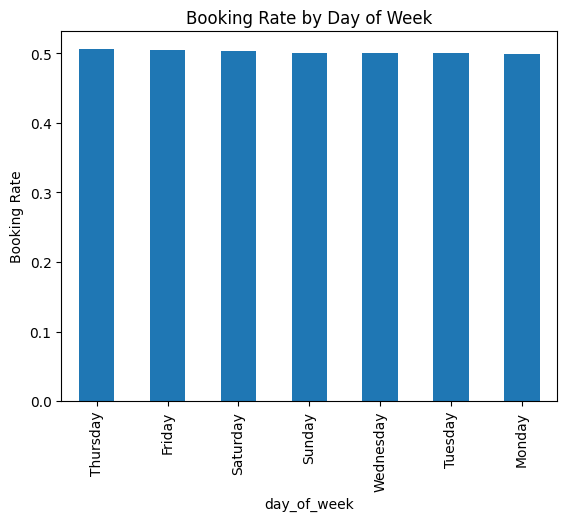

In [ ]:
df['day_of_week'] = df['date'].dt.day_name()

weekday_demand = df.groupby('day_of_week')['is_booked'].mean().sort_values(ascending=False)

weekday_demand.plot(kind='bar', title='Booking Rate by Day of Week', ylabel='Booking Rate')


Text(0.5, 1.0, 'Booking Probability vs Price')

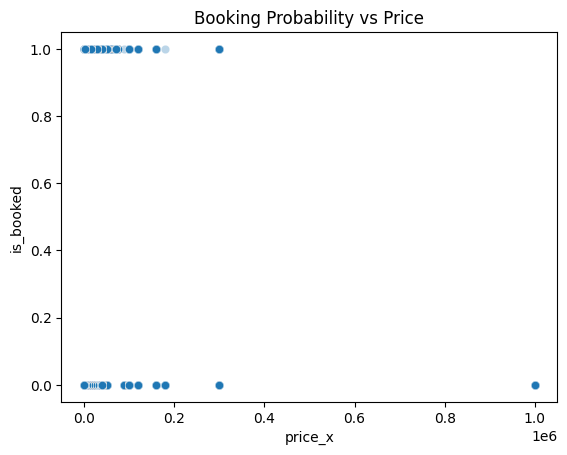

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='price_x', y='is_booked', alpha=0.3)
plt.title('Booking Probability vs Price')


<Axes: title={'center': 'Booking Rate by Room Type'}, xlabel='room_type', ylabel='Booking Rate'>

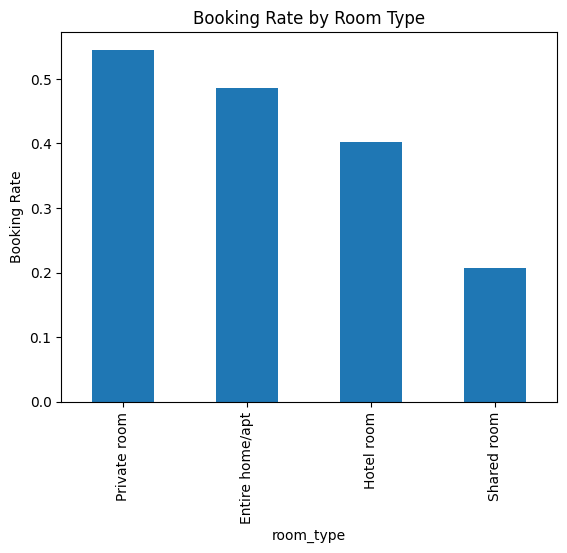

In [ ]:
room_type_demand = df.groupby('room_type')['is_booked'].mean().sort_values(ascending=False)

room_type_demand.plot(kind='bar', title='Booking Rate by Room Type', ylabel='Booking Rate')


Text(0.5, 1.0, 'Price Distribution by Bedroom Count')

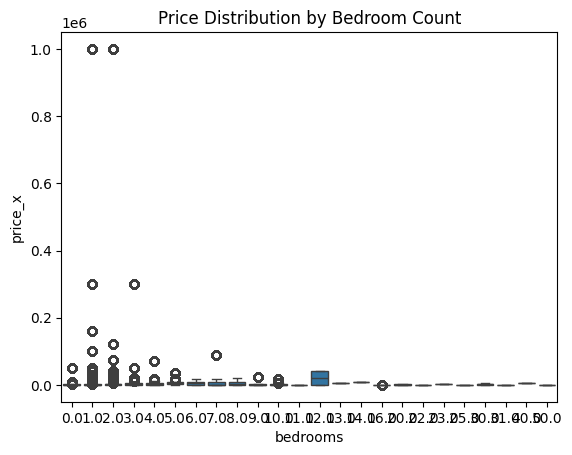

In [ ]:
sns.boxplot(data=df, x='bedrooms', y='price_x')
plt.title('Price Distribution by Bedroom Count')

**#Rule-Based approach**

In [ ]:
def dynamic_price(row):
    price = row['price_x']  # base price

    # Weekend increase
    if row['date'].weekday() in [4, 5]:  # Friday, Saturday
        price *= 1.15

    # Weekday discount
    elif row['date'].weekday() in [0, 1, 2]:  # Mon–Wed
        price *= 0.90

    # Seasonal boost
    if row['date'].month in [12, 1]:
        price *= 1.20

    # Room type modifier
    if row['room_type'] == 'Shared room':
        price *= 0.80
    elif row['room_type'] == 'Entire home/apt':
        price *= 1.05

    # Bedroom count
    if row['bedrooms'] and row['bedrooms'] > 2:
        price *= 1.10

    return round(price, 2)

df['dynamic_price'] = df.apply(dynamic_price, axis=1)


In [ ]:
df['static_revenue'] = df['price_x'] * df['is_booked']
df['dynamic_revenue'] = df['dynamic_price'] * df['is_booked']

total_static_rev = df['static_revenue'].sum()
total_dynamic_rev = df['dynamic_revenue'].sum()
improvement = (total_dynamic_rev - total_static_rev) / total_static_rev * 100

print(f"Static Revenue: ${total_static_rev:,.2f}")
print(f"Dynamic Revenue: ${total_dynamic_rev:,.2f}")
print(f"Revenue Increase: {improvement:.2f}%")

Static Revenue: $2,719,788,816.00
Dynamic Revenue: $2,945,256,183.99
Revenue Increase: 8.29%


Text(0.5, 1.0, 'Booking Probability vs Dynamic Price')

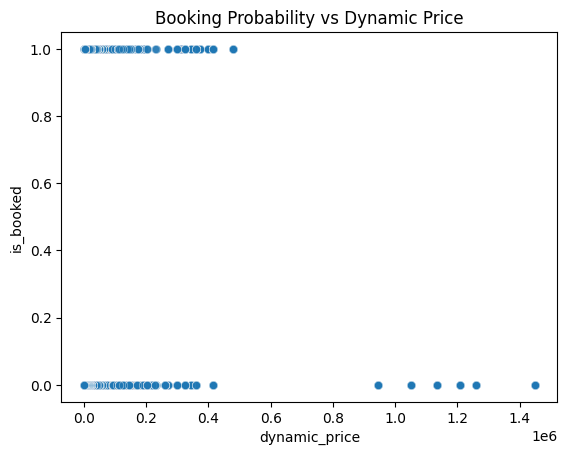

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='dynamic_price', y='is_booked', alpha=0.3)
plt.title('Booking Probability vs Dynamic Price')

Text(0.5, 1.0, 'Static vs Dynamic Price Distribution')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


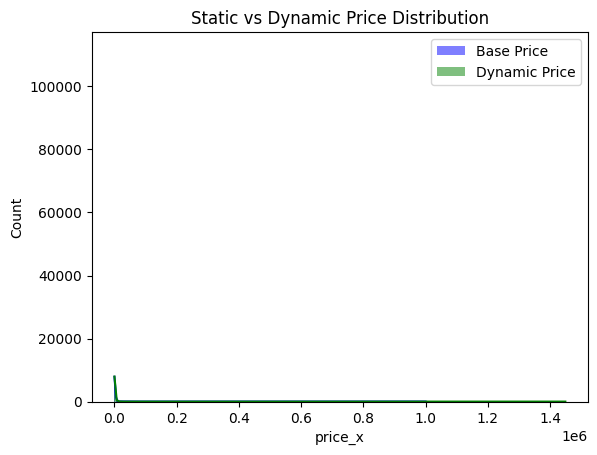

In [ ]:
sns.histplot(df['price_x'], color='blue', label='Base Price', kde=True)
sns.histplot(df['dynamic_price'], color='green', label='Dynamic Price', kde=True)
plt.legend()
plt.title('Static vs Dynamic Price Distribution')


In [ ]:
# Group by listing ID and calculate rolling average occupancy
df['30d_avg_occupancy'] = df.groupby('id')['is_booked'].transform(
    lambda x: x.rolling(window=30, min_periods=1).mean()
)


In [ ]:
print(df.columns)  # Should now include '30d_avg_occupancy'
print(df[['id', 'date', 'is_booked', '30d_avg_occupancy']].head(35))

Index(['id', 'date', 'available', 'price_x', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'is_booked', 'room_type',
       'neighbourhood', 'bedrooms', 'bathrooms', 'accommodates', 'price_y',
       'month', 'day_of_week', 'dynamic_price', 'static_revenue',
       'dynamic_revenue', '30d_avg_occupancy'],
      dtype='object')
       id       date  is_booked  30d_avg_occupancy
0   27934 2024-12-26          0           0.000000
1   27934 2024-12-27          1           0.500000
2   27934 2024-12-28          1           0.666667
3   27934 2024-12-29          1           0.750000
4   27934 2024-12-30          0           0.600000
5   27934 2024-12-31          0           0.500000
6   27934 2025-01-01          0           0.428571
7   27934 2025-01-02          0           0.375000
8   27934 2025-01-03          0           0.333333
9   27934 2025-01-04          0           0.300000
10  27934 2025-01-05          0           0.272727
11  27934 2025-01-06          0           0.

In [ ]:
import pandas as pd
import numpy as np

# Handle missing/invalid values
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mode_day = df['day_of_week'].mode()[0]
df['day_of_week'] = (
    df['day_of_week']
    .fillna(mode_day)
    .str.capitalize()  # Ensure proper casing
    .replace({'Fri': 'Friday', 'Sat': 'Saturday', 'Sun': 'Sunday'})  # Fix abbreviations
    .where(df['day_of_week'].isin(days), mode_day)  # Replace invalid entries
)

# Cyclical encoding
df['day_num'] = df['day_of_week'].map(lambda x: days.index(x))
df['day_sin'] = np.sin(2 * np.pi * df['day_num'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_num'] / 7)



MAE: $2389.54
R²: -0.33


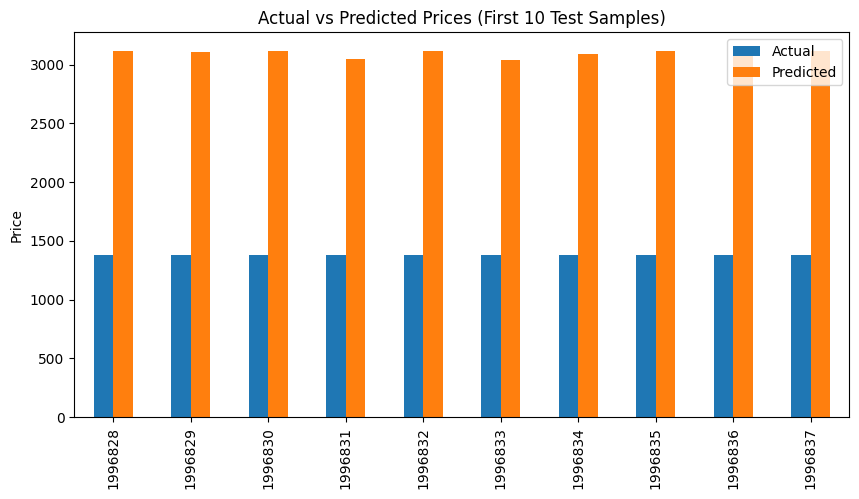

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. Convert 'date' to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['id', 'date']).reset_index(drop=True)

# 2. Feature Engineering

# Cyclical encoding for day_of_week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Fill missing or invalid day_of_week with the mode
mode_day = df['day_of_week'].mode()[0]
df['day_of_week'] = (
    df['day_of_week']
    .fillna(mode_day)
    .str.capitalize()
    .replace({'Fri': 'Friday', 'Sat': 'Saturday', 'Sun': 'Sunday'})
)
df['day_of_week'] = df['day_of_week'].where(df['day_of_week'].isin(days), mode_day)
df['day_num'] = df['day_of_week'].map(lambda x: days.index(x))
df['day_sin'] = np.sin(2 * np.pi * df['day_num'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_num'] / 7)

# 30-day rolling average occupancy per listing
df['30d_avg_occupancy'] = (
    df.groupby('id')['is_booked']
    .transform(lambda x: x.rolling(window=30, min_periods=1).mean())
)

# 3. Select features and target
features = ['day_sin', 'day_cos', 'month', 'bedrooms', '30d_avg_occupancy']
target = 'price_x'
X = df[features]
y = df[target]

# 4. Handle missing values (drop rows with any NaN in features or target)
df_clean = df.dropna(subset=features + [target])
X = df_clean[features]
y = df_clean[target]

# 5. Train/test split (time-based)
train_size = int(0.8 * len(df_clean))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# 6. Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 7. Predict and store predictions
test_preds = model.predict(X_test)
df_clean.loc[X_test.index, 'ml_price'] = test_preds

# 8. Evaluation
print(f"MAE: ${mean_absolute_error(y_test, test_preds):.2f}")
print(f"R²: {r2_score(y_test, test_preds):.2f}")

# 9. Visual inspection
pd.concat([
    y_test.rename('Actual'),
    pd.Series(test_preds, index=y_test.index, name='Predicted')
], axis=1).head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Actual vs Predicted Prices (First 10 Test Samples)')
plt.ylabel('Price')
plt.show()



In [1]:
pip freeze > requirements.txt